This notebook demonstrates the basic functionality for using

- `Jackstraw()` to test for association between variables and principal components.
- `permutationPA` to estimate the number of statistically significant principal components.

This material follows https://cran.r-project.org/web/packages/jackstraw/vignettes/jackstraw.pdf closely.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from seaborn.apionly import heatmap

from jackstraw.jackstraw import Jackstraw
from jackstraw.synthetic_data import sample_rjack_ex31

# sample some sythetic data

Text(373.364,0.5,'observations')

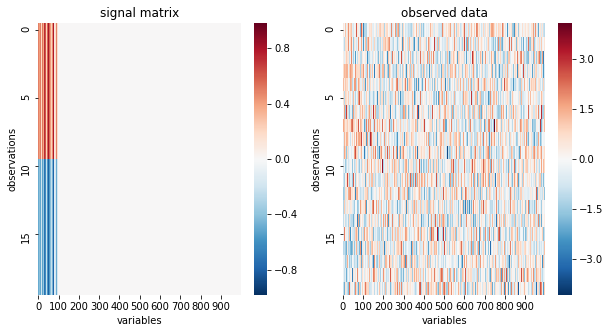

In [2]:
Y, LB = sample_rjack_ex31(std=1)

plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
heatmap(LB, xticklabels=100, yticklabels=5)
plt.title('signal matrix')
plt.xlabel('variables')
plt.ylabel('observations')

plt.subplot(1, 2, 2)
heatmap(Y, xticklabels=100, yticklabels=5)
plt.title('observed data')
plt.xlabel('variables')
plt.ylabel('observations')

# fit jackstraw

In [3]:
jack = Jackstraw(S = 1, B = 10000)
jack.fit(Y, method='pca', rank=1)

In [4]:
# which variables did jackstraw reject
jack.rejected

array([  0,   9,  17,  18,  19,  37,  41,  44,  51,  55,  66,  68,  69,
        73,  76,  85,  88,  90,  91,  94,  96, 286, 490])

Text(0.5,0,'p-values')

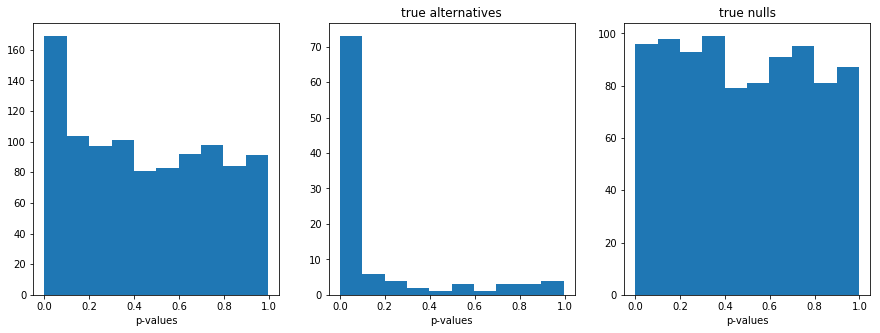

In [5]:
plt.figure(figsize=[15, 5])

plt.subplot(1, 3, 1)
plt.hist(jack.pvals_raw)
plt.xlabel('p-values')

plt.subplot(1, 3, 2)
plt.hist(jack.pvals_raw[:100])
plt.title('true alternatives')
plt.xlabel('p-values')

plt.subplot(1, 3, 3)
plt.hist(jack.pvals_raw[100:])
plt.title('true nulls')
plt.xlabel('p-values')

# permutation test to select rank

In [6]:
from jackstraw.permutationPA import permutationPA

In [7]:
r_est, p_vals = permutationPA(Y)
r_est

1